# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not some one has heart disease based on the medical records

We're going to take the following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation(Incorporates all previous steps)

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease? 


## 2. Data
This heart disease data set from the Cleveland region from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Heart+Disease/
 It can also be found on Kaggle.
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
## 3. Evaluation
 > Because this is predicting something that's significant, we want a highly accurate model. If we can reach a 95% accuracy of predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 
Thisis where you'll get different information about each of the features in your data.

**Create a data  dictionary**
Do this to provide some extra clarity to your exploration. You can do this with your own research or when you're in a team a subject matter expert
1. age: 'age in years',
2. sex: 'sex (1 = male; 0 = female)',

3. cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
* Value 0: normal
*  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 

11. slope: the slope of the peak exercise ST segment
* Value 1: upsloping
*  Value 2: flat
*  Value 3: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

14. num(target): diagnosis of heart disease (angiographic disease status)
* Value 0: < 50% diameter narrowing (No heart disease)
* Value 1: > 50% diameter narrowing (Patient has heart disease)
(in any major vessel: attributes 59 through 68 are vessels) 

In [3]:
# Preparing the tools
# we're going to use pandas, matplotlib, numpy and sci-kit learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# We want our plots to appear inside the notebook

# Models
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from jupyterthemes import jtplot
# jtplot.style(theme='oceans16')

### **Load Data**

In [4]:
df = pd.read_csv('6.1 heart-disease.csv')
df.shape # (rows and columns)

(303, 14)

**Let's do some data exploration!!**

This is known as Exploratory Data Analysis or EDA for short.
There's no set way to do this, but the main thing that needs to be happening is the process of you getting familiar with your data

**Bunch of ways to start**
* Compare different columns to each other
* Visualize the columns that are similar and different 
* Compare values to the target column, 
* refer back to the data dictionary

**My goal is to become a subject matter expert on the dataset that you're working with**

### Since EDA has no bounded method, we'll write down a short checklist of questions 
so that we can come back to that will help us to explore our data
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data

(just an EDA checklist to start with as a bare minimum of what we're trying to figure out



In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Let's find out how many patients are in each set
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

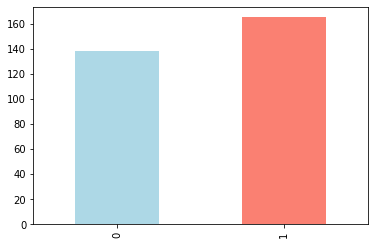

In [7]:
df['target'].value_counts().plot(kind='bar', color = ['salmon', 'lightblue']);

In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.corr() # Correlation matrix (See how much each column relate to each other)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Heart Disease Frequency according to Sex

We want to compare the sex attribute to the target attribute 

In [11]:
df.sex.value_counts()
# 1 = male, 0 = female

1    207
0     96
Name: sex, dtype: int64

In [12]:
# If we want to compare the sex column to the target column
# good function is crosstab
pd.crosstab(df.target, df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


**Sentences that interprets the data**
* 72 out of 96 women have heart disease
* 114 out of 207 men do not have heart disease
* 93 men out of 207 men do have heart disease
* 44% of men have heart disease
* 75% of the women here have heart disease

Just looking at the comparison between sex and target. We can infer that:
* Based on our existing dataset any woman we choose will have a 75% chance of having heart disease
* Based on our existing data, there is a 62.5% chance that anybody we select will have heart disease.
* Theresa 44% chance that any male that is selected will have heart disease

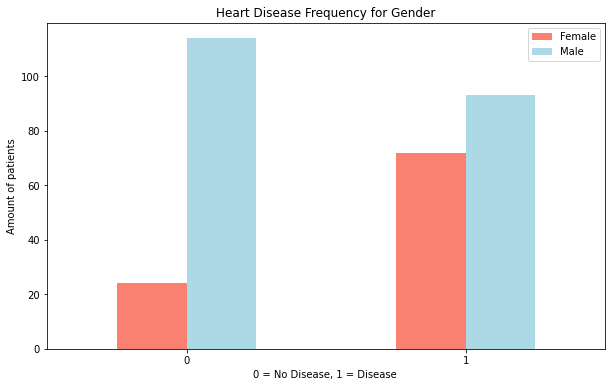

In [9]:
# Create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('0 = No Disease, 1 = Disease ')
plt.ylabel('Amount of patients')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()

In [10]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

This can't be visually represented in a bar graph, as there is 91 different types of values. THis would be easier interpreted on a scatter plot

* Features are often referred to as independent variables
* Targets are referred to as the dependent variable. 

When comparing columns to see the relation in your dataset, compare dependent and independent variables

### Age vs. Max Heart Rate for Heart Disease

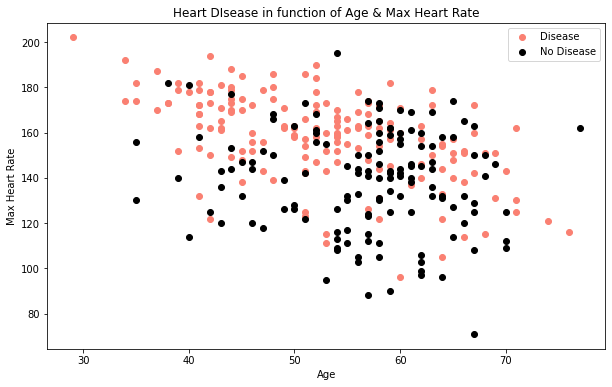

In [11]:
# Create another Figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df['target']==1], df.thalach[df['target']==1], c='salmon')


# Scatter with negative examples
plt.scatter(df.age[df['target']==0], df.thalach[df['target']==0], c='black')

# Add some helpful info
plt.title('Heart DIsease in function of Age & Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

<AxesSubplot:ylabel='Frequency'>

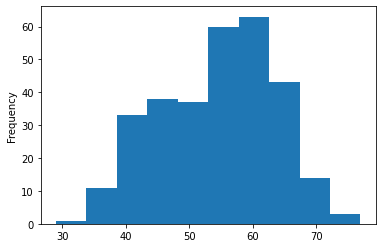

In [12]:
# Check distribution of the age column with histogram
df.age.plot(kind='hist')

### Heart Disease Frequency per chest pain type
3. cp: chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

In [13]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


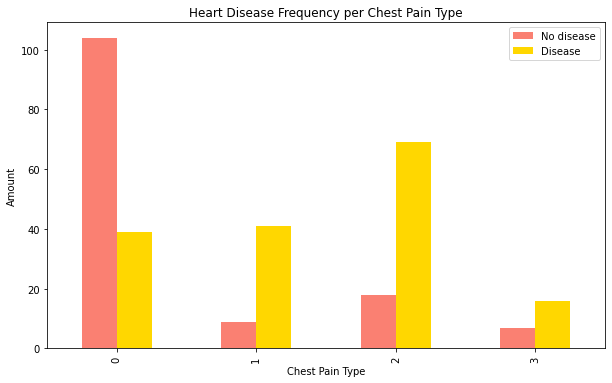

In [14]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon', 'gold'])

# Add some communication 
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.show()

Next we'll check out the correlation between our independent variables and our dependent variables with a correlation matrix (Done already from above)

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


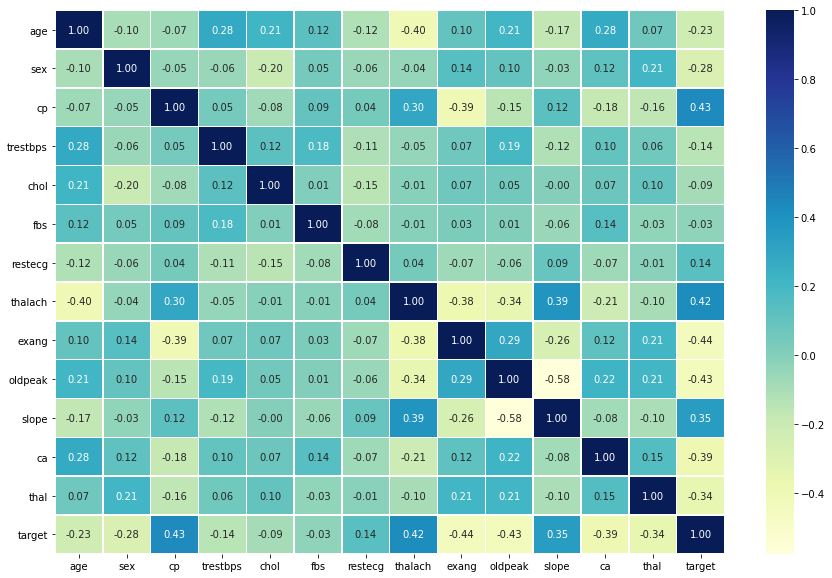

In [16]:
# Let's make our correlation matrix a little prettier (Using seaborns heatmap)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths = 0.5, fmt='.2f', cmap='YlGnBu' )

* A higher positive value means a potential positive correlation(As one variable increase, so does the other)
* A higher negative value means a potential negative correlation(As on variable increase, the other decreases)

The correlation between exang and the target column is -0.44.
Remember that exang is exercise induced angina (1 = yes; 0 = no).
> So this means that, strangely enough, according to the correlation value here, if someone gets chest pain during exercise (exang = 1), their chance of having heart disease goes down (target=0)

What we want to do next is Model-Driven EDA. That means building a ML model to  derive insights as to how the independent variables contribute to the target variable

## 5. Modelling

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Split into X & Y
x = df.drop(labels='target', axis=1)
y = df.target

In [19]:
# Split into training and test splits
np.random.seed(2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [21]:
y_train

237    0
106    1
10     1
153    1
77     1
      ..
75     1
22     1
72     1
15     1
168    0
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets, It's time to build a machine learning model.

We'll train it (find the patterns) on the training set

And we'll test it (use the patterns) on the test set

We're going to try three different machine learning models
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

Logistic Regression isn't in the machine learning map, and ironically, it's name might mean that its a Regression model, but it's actually for Classification. 

>There's so many ways to do machine learning, alot of it is just searching for the optimal solution for your problem.
* While Logistic Regression wasn't on the map, Googling "Sci-kit learn machine learning models for classification problems would easily bring up Logistic Regression in at least one of the pages.
* Models not being on the map shows just how 'all over the place' data science can be, but i think it shows just how much experimentation can really happen. It shows how many possibilities are actually there for all aspects of the practice

In [22]:
# Put models in a dictionary so we can run all models from a function
models = { 'Logistic Regression' : LogisticRegression(),
           'K-Nearest Neighbors' : KNeighborsClassifier(),
           'Random Forest' : RandomForestClassifier()}

#Create a function to fit and score our model

def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and Evaluates given machine learning models.
    models: a dict of different sklearn ML models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    '''
    #Set random seed
    np.random.seed(43)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [23]:
modelius = fit_and_score(models, x_train, x_test, y_train, y_test)
modelius

C:\Users\Armani\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'K-Nearest Neighbors': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

## Model Comparison

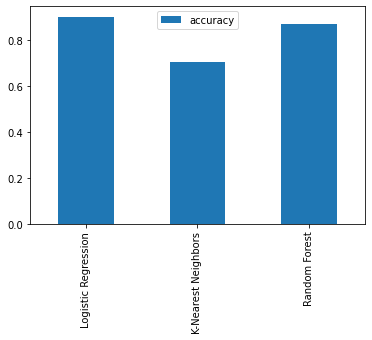

In [24]:
model_compare = pd.DataFrame(modelius, index = ['accuracy'])
model_compare.T.plot.bar()
plt.show()

In [25]:
model_compare

,Logistic Regression,K-Nearest Neighbors,Random Forest
accuracy,0.901639,0.704918,0.868852


Now we've got a baseline model, and we know a model's first predictions aren't what we should base our next step on
We should look at:
* Hyper-Parameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

 The first two points are things you will be working on as long a you're working on building a machine learning model.
 
The other ones are more ulitilized here because we're training a classification ML model

So here we will try to tune our model so it performs well, and also doesnt overfit our data.

We're aiming to create a model that works well on unseen examples

Even though our KNN model performed the worse, let's try tuning it. 

So how would we start? Well obviously with a google search silly!

## Hyperparameter tuning by hand

In [26]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(x_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    # Updqte the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [27]:
test_scores

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885]

In [28]:
train_scores

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

Maximum KNN score on the test data: 77.049180%


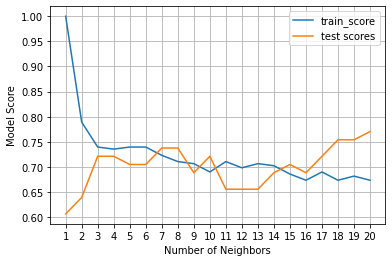

In [29]:
plt.plot(neighbors, train_scores, label='train_score')
plt.plot(neighbors, test_scores, label='test scores')
plt.xticks(np.arange(1, 21, 1))#Puts a list of 1 to 21 with intervals of 1 on the x axi
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.grid()
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:2f}%')

So we can say that a value of 20 neighbors yields 77% accuracy,. which is the best score.

So this is the nail in the coffin for our experimenting phase with the KNN model right here,  we've improved the model but it still isn't near what our Logisitc Regression or Random orest models' results

This a good part of the experimentation phase here. Now we're finding out what aspects of the models would work and wouldn't work

We want to work through our models in this way. Wher we locate the best parameters with a google search and then tweak them. 
*It should be known however that tweaking them via one by one isnt efficicent. Next, we'll use RandomizedSearchCV

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune
* Logistic Regression()
* Random Forest Classifier()

... using RandomizedSearchCV

In [30]:
Loji = LogisticRegression()

In [31]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = { 'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear'],
                'penalty' : ['l1', 'l2']}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(100, 1000, 50 ),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}

Now we've got hyperparameter grids set up for each of our models, let's tune them using RandomizedSearchCv

In [32]:
# Tune Logistic Regresssion

#Set up random seed so we have reproducible results
np.random.seed(2)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv = 10, #How much cross validations
                                n_iter=20, # How much comibinations of params
                                verbose=True) # Send output while processing

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [44]:
rs_log_reg.score(x_test, y_test)

0.9180327868852459

We have tuned our Logistic Regression model byt we've barely seen any real improvement. 
* The baseline model is 90% while our tuned result is 91%

Interesting. The baseline model clearly performs well. Let's do RandomForestCLassifier

In [45]:
# Set up Random seed
np.random.seed(12)

# Set up random hyperparamter search for RandomForestCLassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), 
                            param_distributions= rf_grid, 
                            cv=10,
                            n_iter=20,
                            verbose=2)
rs_rfc.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=350; total time=   0.3s
[CV] END m

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [50]:
rf = RandomForestClassifier()
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [51]:
#Evaluate the RandomSearch Random Forest Model
rs_rfc.score(x_test, y_test)

0.9016393442622951

In [52]:
rs_rfc.best_params_

{'n_estimators': 750,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [53]:
modelius

{'Logistic Regression': 0.9016393442622951,
 'K-Nearest Neighbors': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

Okay so we've actually increased the Random Forest Classifier model's accuracy by 4%. That's actually pretty impressive, but the 4 % increase only makes it the same as Logistic Regression. So we will use the Logistic Regression. 

## Tuning Hyperparameters using GridSearchCV

Since our Logistic Regression model provides the best score so far, we'll try to improve it again with GridSearchCV

In [54]:
# Different hyperparameters for our Logistic Regression
log_reg_griddy = {'C' : np.logspace(-4, 4, 30),
                  'solver' : ['liblinear'],
                  'penalty' : ['l1', 'l2']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_griddy,
                          cv = 10,
                          verbose=2)

# FIt grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, so

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [56]:
gs_log_reg.score(x_test, y_test)

0.9180327868852459

So here we got the same value as  when we ran RandomizedSearchCV. I must say, this is impresssive for a model that wasn't on the machine learning map.

> This just goes to show that there are many possibilites and things to try. So its **VERY IMPORTANT** to do your own research

## Evaluating our tuned Machine learning classifier, beyond accuracy

* ROC curve and an AUC Score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

..and it would be awesome if cross-validation was used where possible

First things first, when we evaluate a model, it compares it's initial values to the truth labels(the `y_test` data)

To make comparisons and evaluate our trained model, first we need to make predictions so we have something to evaluate with

In [57]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [58]:
y_test

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

**ROC Curve**

A receiving operating characteristic, or ROC curve , is a graphical plot that illustrates the diagnostic ability of a binary classifier system as it's discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings

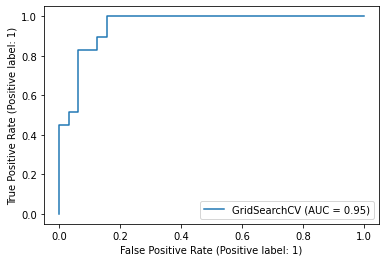

In [59]:
# Plot ROC curve and calculate  AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [60]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[27  5]
 [ 0 29]]


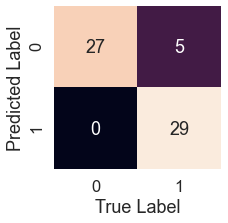

In [61]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using seaborn's heatmap

    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix. Let's create a classification report, as well as a cross validated Precision and F-1 Score

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



Okay, so now we have our Precision, Recall and F1 scores. However. this is the metric measured on just one run on the test set. It isn't cross validated

So let me do a brief overview of these metrics.
* Precision indicates the proportion of positive identifications(a.ka. the model predicts label 1) which were actually correct. so a model which predicts no false positives has a precision of 1.0 (hence precision being 1 above)
* Recall indicates the proportion of actual positives, which were correctly classified. So a model which produces no false negatives, has a recall of 1
> A model with a 0 in the top right corner of the confusion matrix will have a recall of 1, and a model with a 0 in the lower left corner of the confusion matrix will have a precision value as 1

* F! is a combination of Precision and Recall, if precision and recall were both 1, F1 would also be 1

* Support is the number of samples each metric was calculated on. so in our test set, there was 32 patients (or target values) which was 0 (which didn't have heart disease)

* macro avg is the average precision, recall and f1 score between labels(so with 1 and 0). Macro averages doesn't take class imbalances into account.. SO if you do have class imbalances, pay attention to the macro avg
* weighted avg calculates the average between precision, recall and the F1 score, but its weighted. weighted means each metric is calculated with respect to how many samples there are in each class This metric will favor the majority label..SO the weighted average of recall would be higher if label 1 had 10-15 more samples, because that label would have more weight.

 ## Calculate evaluation metrics using cross-validation
    
We're going to be using `cross_val_score` to calulate accuracy, precision, recall and f1-score of our model

In [63]:
# CHeck best hyper-parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [64]:
# Create a new classifier with those best parameters
log_reg_clf = LogisticRegression(C=0.20433597178569418, penalty='l2',solver='liblinear')

In [67]:
# Cross-validated accuracy
cv_acc = cross_val_score(log_reg_clf,
                         x,
                         y,
                         cv=10,
                         scoring='accuracy')

cv_acc_mean = np.mean(cv_acc)
cv_acc

array([0.87096774, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.86666667, 0.83333333, 0.86666667, 0.7       , 0.73333333])

In [66]:
# Cross-validated precision
cv_precise = cross_val_score(log_reg_clf,
                         x,
                         y,
                         cv=10,
                         scoring='precision')
cv_precise_mean=np.mean(cv_precise)
cv_precise

array([0.80952381, 0.78947368, 0.84210526, 0.9375    , 0.85      ,
       0.92857143, 0.78947368, 0.83333333, 0.66666667, 0.75      ])

In [95]:
# Cross-validated recall
cv_recall = cross_val_score(log_reg_clf,
                         x,
                         y,
                         cv=10,
                         scoring='recall')
# Remember to look up keyboard shortcut for multiple cursors in one cell
cv_recall_mean = np.mean(cv_recall)
cv_recall

array([1.        , 0.88235294, 0.94117647, 0.88235294, 1.        ,
       0.8125    , 0.9375    , 0.9375    , 0.875     , 0.75      ])

In [97]:
# Cross-validated f1
cv_f1 = cross_val_score(log_reg_clf,
                         x,
                         y,
                         cv=10,
                         scoring='f1')
cv_f1_mean=np.mean(cv_f1)
cv_f1

array([0.89473684, 0.83333333, 0.88888889, 0.90909091, 0.91891892,
       0.86666667, 0.85714286, 0.88235294, 0.75675676, 0.75      ])

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

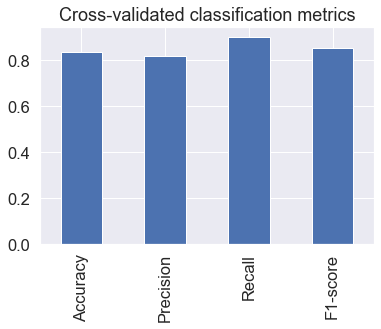

In [104]:
# Visualize our cross-validated metrics

cv_metrics = pd.DataFrame({'Accuracy' : cv_acc_mean,
                           'Precision' : cv_precise_mean,
                           'Recall' : cv_recall_mean,
                           'F1-score' : cv_f1_mean},
                            index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend =False)
# Remember to transpose your data before plotting it. The shape will not work properly with the diagram

In [105]:
cv_metrics.T

,0
Accuracy,0.834839
Precision,0.819665
Recall,0.901838
F1-score,0.855789


### Feature Importance

Feature importance is another way of asking "Which features contributed the most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way of doing it is to search google for 'Find feature importance for (MODEL NAME).

Let's find the feature importance for our Logistic Regression Model

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Which of these features contribute to predicting the target?

In [22]:
# Fit an instance of LogisticRegression
# Create a new classifier with those best parameters
logreg_clf = LogisticRegression(C=0.20433597178569418, penalty='l2',solver='liblinear')
logreg_clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

Through our 'research' we found out that there's an attribute within the Logistic Regrssion model called `coef_` which stands for coefficient. It gives us the coefficient of how each column contribute to the target label(s). Relates to the correlation in how its measured.

In [23]:
logreg_clf.coef_

array([[ 0.00892954, -0.92600976,  0.69014018, -0.01324933, -0.0030762 ,
        -0.04173685,  0.33064708,  0.02473784, -0.48720738, -0.40648376,
         0.42956476, -0.57312977, -0.57183671]])

Let's make it more visual so we can interpret it

In [24]:
# Match coef's features to columns
feature_dict = dict(zip(df.columns, list(logreg_clf.coef_[0])))
feature_dict

{'age': 0.008929542666466889,
 'sex': -0.9260097641571073,
 'cp': 0.6901401827155222,
 'trestbps': -0.013249331073468713,
 'chol': -0.0030762029807249744,
 'fbs': -0.04173684815097747,
 'restecg': 0.3306470835154284,
 'thalach': 0.024737838496630162,
 'exang': -0.4872073805974715,
 'oldpeak': -0.4064837637480647,
 'slope': 0.42956475883165784,
 'ca': -0.5731297659781324,
 'thal': -0.5718367117613578}

<AxesSubplot:title={'center':'Feature importance'}>

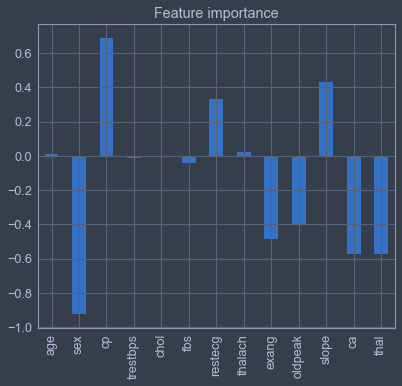

In [25]:
# Visualize feature importance
feature_df = pd.DataFrame (feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature importance', legend=False)

Sex is an extremely negative value apparently. If the value is negative, then there's a negative relationship there.
For instance, when the value for sex increases, the target value increases because of the negative coefficient.

In [115]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


Hmm. I'm not seeing  the target value decreasing as sex increases. 

OH!. I think i get it. We should look at the ratio.
the first ratio would be 1 : 3
    
    second one is more half and half. so we can say that sex raising in 
value, decreases the target.. but even that estimation doesn't accurately depicts what's going on here

In [116]:
pd.crosstab(df['target'], df['slope'])

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


slope: the slope of the peak exercise ST segment
* Value 1: upsloping
*  Value 2: flat
*  Value 3: downsloping

Our model is giving us a positive coefficient for slope. This means that as the slope value increases, the model is more likely to predict a higher value of the target

(Our higher value of the target is 1 since we're only predicting 0 and 1)

Using feature importance, we can see what features in our dataset do not contribute to our results and remove them. This will save us processing power and make our model more efficient. It wil also show us what features make a difference

## Conclusion (for metric)

Unfortunately we didn't meet our mark. Our Logistic Regression model only reached an accuracy of 91% but not 95%.

If you haven't hit your evaluation metric yet.. ask yourself..
* Could you collect more data?
* Could you try a better model? (Catboost or XGBoost. Look these up. find out)
* Could we improve the current models? (I mean beyond what we've done so far)
* If your model is goond enough,(You hit your eval metric) how would you export it?

Are you thinking that the process isn't structured? That is a reasonable thought.. After all, these questions are just the start and there is so much more research that could be done.. This is what makes machine learning difficult. But it also makes it highly experimentative.

It's the type of skill where hypothesizing and coming up with questions to research  is crucial to your ability to move forward. Learning is the mian priority, and to me that is beautiful. Learning being the main prioirity is the foundation of growth.